## About the model
The Weather Research and Forecasting Model (WRF) is a modern numerical weather model that is used for operational weather forecasts and research. Deveolopment of the weather model began in ... Now, the model has nearly 50,000 users, and it used for research all around the globe. 

The weather model consists of many components that contribute to weather forcasts. There are modules that are used to calculate incoming radition from the sun, the transfer of heat from the land and ocean surfaces, the movement of air (wind), mouisture and precipitation, and even chemical components of the atmosphere. 



## The forecast process
The forecast process begins with observations of our environment. This observations consists of satellite data, weather balloons, weather stations, instruments mounted on aircraft and boats, as well as other sources. A software package ingests all of this data from around the globe and sycronizes it. The goal is to create an instaneous snapshot of the atmosphere. The data is then converted into a format that usabale (and physically consistent) with a weather model. This process is known as data assimilation. Once the data is assimilated a file is created, which is called an initial condition. The initial condition is the current state of the atmosphere. 

When it is time to run the model, a user selects a domain. The domain can be as small as a single county, or consist of the entire globe. After the domain is selected, a user will run the preprocessing script, which creates the domain and aligns it with the initial condition. If the domain is small the preprocessing system will establish rules and properties to handel at the edges of the domain, since there is no information as to what whether comes "into" the domain. 

Once preprocessing is completing the WRF model can then start. When the model begins running is decomses the domain into a 3-D grid. It calculates the temerature, wind, rain, and many other atmospheric parameters in the grid and for many layers verticaly. Once the model computes for all grid cells, it then moves to the next time step. This process repeats until the simulation time has concluded. After the simulation has completed, an output file is created, and a user can analyze the data and make a forecast. 

## The Math (that we will not cover) 
The following equations are condensed and abbreviated forms of the non-rotating governing equations for the atmosphere and oceans. Collectively, this system of differential equations can explain the dynamics and movement of the atmosphere and ocean. Broadly, these equations describe fluid motion (the atmosphere behaves just like a fluid).

These equations are embedded within weather models, and they are computationally expensive. This means that many rigirous calculations are needed to solve these equations since no practical analytical solution exists for these equations. 

\begin{align*}
\frac{Du}{Dx}&+\frac{Dv}{Dy}+\frac{Dw}{Dz} = 0 &\qquad \text{Continuity Equation}\\
\frac{Du}{Dt}  &= \frac{1}{\rho}\frac{\partial p}{\partial x} + 
                  \nu\frac{\partial^2 u}{\partial^2 x} 
                  &\qquad \text{Momentum Equation X-Direction} \\
\frac{Dv}{Dt}  &= \frac{1}{\rho}\frac{\partial p}{\partial y} +
                  \nu\frac{\partial^2 v}{\partial^2 y}
                  &\qquad \text{Momentum Equation Y-Direction}\\
\frac{Dw}{Dt}  &= \nabla \Phi + \frac{1}{\rho}\frac{\partial p}{\partial z} + v\nabla^2v +
                  \nu\frac{\partial^2 w}{\partial^ z}
                  &\qquad \text{Momentum Equation Z-Direction}\\
\frac{D\theta}{Dt} &= \frac{\theta}{T}\frac{\dot{Q}}{c_p}
                      &\qquad \text{Thermodynamic/Energy Equation}\\
p &= \rho R T &\qquad \text{Equation of State}\\
\end{align*}


## Running the Model on TACC
Step 1) cd into your home directory
Step 2) cp $SCRATCH/wefoust/Build WRF 
        You should now see the file you downloaded in the directory
        
Step 3) Cd into WPS/ and edit 
        date = 
        duration = (Do not run beyond 24 hours)
        domain   = 
Step 4) run ./wps
Step 5) Open configure .wrf and edit...

Step 6) Run WRF 

Step 7) Check output and see if it is there

Step 8) Visualize Output see code below.


## Libraries Used for Visualization
- Matplotlib
- Basemap
- netCDF4
- wrf-py

In [ ]:
# Edit the Preprocessing File
#1) Use a text editor to open namelist.wps
#Located in /home1/07498/wefoust/Desktop/Build_WRF/WPS

#Edit Start and end date
#start date to 2020-07-08_06:00:00
#end date   to 2020-07-08_06:00:00

3)Edit Domain
#e_we =  X
#e_sn =  Y
#ref_lat   =  34.83,
#ref_lon   = -81.03,

#4 Save and exit

In [ ]:
# Run WPS
#You should see... if ran successfully

In [ ]:
#Edit WRF Namelist
#1) Use a text editor to open namelist
#Located in /home1/07498/wefoust/Desktop/Build_WRF/WRF
#Edit start day, time, and hour. Should match the date above

#dit e_we                                = 74,    112,   94,
#edit e_sn  

In [ ]:
#Run WRF

#Set Env. Variable
export OMP_NUM_THREADS = insert_cores_to_use
./wrf.exe

#Should se WRF_Out if ran successfully 
wrfout_d01_2020-06-24_12:00:00

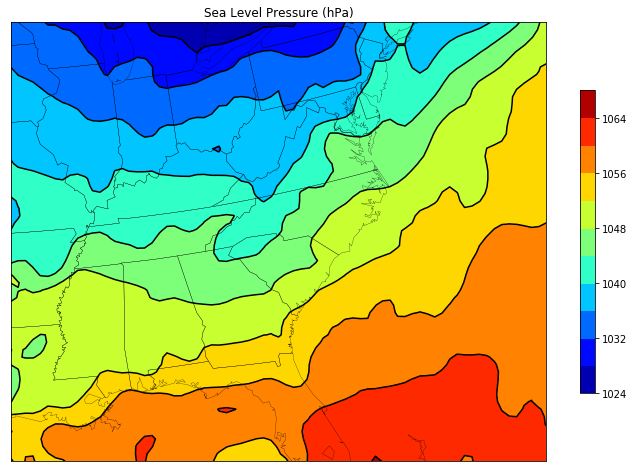

In [10]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords

# Open the NetCDF file
ncfile = Dataset("wrf_test.nc")

# Get the sea level pressure
slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy in some areas
smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
lats, lons = latlon_coords(slp)

# Get the basemap object
m = get_basemap(slp)

# Create a figure
fig = plt.figure(figsize=(12,9))

# Add geographic outlines
m.drawcoastlines(linewidth=0.25)
m.drawstates(linewidth=0.25)
m.drawcountries(linewidth=0.25)

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
x, y = m(to_np(lons), to_np(lats))

# Draw the contours and filled contours
m.contour(x, y, to_np(smooth_slp), 10, colors="black")
m.contourf(x, y, to_np(smooth_slp), 10, cmap=get_cmap("jet"))

# Add a color bar
plt.colorbar(shrink=.62)

plt.title("Sea Level Pressure (hPa)")

plt.show()

In [1]:
#3rd party imports
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset

In [2]:
fh = Dataset('wrf_test.nc', mode='r')

#lons = fh.variables['lon'][0]
#lats = fh.variables['lat'][0]
temp = fh.variables['T'][:]
tmax = fh.variables['T2'][:]



#tmax_units = fh.variables['Tmax'].units

In [3]:
#Gt Lat & Lon
lats = fh.variables['XLAT'][0]
lons = fh.variables['XLONG'][0]

print(lats.shape)
print(lons.shape)
print(lons)
#Get Base Pressure, Perturbation Pressure, and combine them
P = fh.variables['P'][:]
PB = fh.variables['PB'][:]
#PRES = wrf_pres(P,PB)/100. #Divide by 100 to get hPa

#Get perturbation potential temperature, add 300K, and convert to temperature
THETA = fh.variables['T'][:]
#THETA = wrf_theta(THETA)
#TEMP = wrf_temp(THETA,PRES)


#Get some variables
WVMIX = fh.variables['QVAPOR'][:]
U = fh.variables['U'][:]
V = fh.variables['V'][:]
W = fh.variables['W'][:]

#Because of the C-staggered grid in WRF we need to get the velocities centered at the mass points of the grid boxes
#We can do this by averaging the 2 closest grid points to get an estimate of the center
#U = wrf_unstagger(U, 'X' )
#V = wrf_unstagger(V, 'Y' )

#Get the landmask
LM = fh.variables['LANDMASK'][:]

PLevels = np.array([1000,850,700,500,200,100]) 


fh.close() #Close the file

(60, 73)
(60, 73)
[[-93.648926 -93.34589  -93.04297  ... -73.190735 -72.91528  -72.64047 ]
 [-93.632385 -93.328186 -93.02414  ... -73.10214  -72.82587  -72.5502  ]
 [-93.61569  -93.31036  -93.00516  ... -73.01294  -72.73581  -72.45929 ]
 ...
 [-92.450714 -92.06476  -91.67908  ... -66.94281  -66.6109   -66.28015 ]
 [-92.42377  -92.03598  -91.64844  ... -66.8064   -66.47336  -66.14148 ]
 [-92.39661  -92.0069   -91.61749  ... -66.66885  -66.334656 -66.00165 ]]


In [4]:
#print(lons[1,:,1])
#print(tmax)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [5]:
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=5000000,height=3500000,
            resolution='l',projection='stere',\
            lat_ts=40,lat_0=lat_0,lon_0=lon_0)



# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)

print(tmax.shape)


#print(np.squeeze(tmax))
cs = m.pcolormesh(lons[1,1,:],lats[1,:,1],tmax[1,:,:],shading='flat',cmap=plt.cm.jet,latlon=True)

#cs = m.pcolor(xi, yi,tmax[1,:,:], cmap='RdBu')
#cs = m.pcolor(xi, yi, np.squeeze(tmax,axis=0), cmap='RdBu')
##cs = m.pcolor(xi, yi, np.squeeze(tmax), cmap='RdBu')
#cs = m.pcolor(x, y, z, cmap='RdBu')
#cs = m.pcolor(xi,yi,np.squeeze(tmax))


(3, 60, 73)


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

In [ ]:

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# Add Colorbar
##cbar = m.colorbar(cs, location='bottom', pad="10%")
##cbar.set_label(tmax_units)

# Add Title
plt.title('DJF Maximum Temperature')

plt.show()